# Obtener la Edad de un Individuo desde su RUT

Intuitívamente se sabe que existe una relación entre la edad de una persona y el número correlativo de su RUT, en donde personas que cuentan con una mayor edad, suelen tener un número correlativo de RUT bajo. Para poder probar esta hipótesis se utilizará un método de aprendizaje estadístico básico que nos permitirá inferir la relación existente entre el número correlativo del RUT de la Persona y su edad.

## RUT
El Rol Único Nacional, conocido también por el acrónimo RUN, es el número identificatorio único e irrepetible que posee todo chileno, residente o no en Chile, y todo extranjero que permanezca, temporal o definitivamente, con una visa distinta a la visa de turista en dicho país.

El RUN se otorga siguiendo un orden correlativo, por lo tanto es muy posible que una persona con un RUN menor sea de mayor edad, dado que la mayor parte de los RUN proviene de inscripciones de nacimiento.

El RUN y el RUT constan de dos partes separadas por un guion: el número correlativo y el dígito verificador o DV. El DV consta de un dígito que va del 0 (cero) al 9 (nueve) y la letra K, que se obtiene a partir del correlativo mediante el cómputo de un algoritmo. 

## Regresión
La Regresión es un conjunto de procesos estadísticos para estimar relaciones entre variables. La regresión nos ayuda a entender cómo cambia una variable en función de otra variable, junto con entender la fuerza de relación entre ellas.

## Datos
Se realizaron búsquedas en Google para encontrar documentos que contuvieran los términos edad y rut, estos documentos fueron procesados y se consolidaron todos en un archivo separado por comas.

## Método
Se utilizó el lenguaje de programación python bajo los siguientes módulos:
* Pandas: Biblioteca para el manejo y estructuración de datos.
* Numpy: Biblioteca para la realización de cálculos vectoriales.
* Seaborn: Visualización de los resultados.
* Scipy: Conjunto de pruebas y modelos estadísticos.
* Math: Módulo de cálculos matemáticos.
* Datetime: Módulo para interactuar con fechas.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import math
import datetime as dt

Se importan los datos y se determinan los tipos de variable.

In [4]:
datos = pd.read_csv("rut.csv", 
                   low_memory=False, 
                   error_bad_lines=False,
                   sep=";")

In [5]:
datos["fechaNacimiento"] = pd.to_datetime(datos["fechaNacimiento"])

In [6]:
datos["anoNacimiento"] = datos["fechaNacimiento"].dt.year + (datos["fechaNacimiento"].dt.month - 1)/12

Dimensiones de la tabla.

In [90]:
datos.shape

(1175, 3)

Se elimina el dígito verificador.

In [7]:
datos['rut'] = datos['rut'].astype(str).str[:-2].astype(np.int64)

Se ajusta el modelo de regresión lineal.

In [13]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(datos.rut,datos.anoNacimiento)

Pendiente de la curva

In [14]:
slope

3.3363697569700348e-06

Intercepto de la curva

In [15]:
intercept

1932.2573852507373

Nivel de ajuste del modelo.

In [16]:
r_value**2

0.9574379851501933

## Resultados

El año de nacimiento del individuo está deteminado por el valor del número correlativo del RUT, multiplicado por la pendiente de la curva ajustada sumado a una constante.

In [89]:
rut = 5126663
fecha_nac = int(rut)*slope+intercept
ano_nac = math.floor(fecha_nac)
mes_nac = int(round((fecha_nac-ano_nac)*12))
fecha_nac = dt.date(ano_nac, mes_nac, 1)
fecha_hoy = dt.date.today()
from dateutil.relativedelta import relativedelta
edad = relativedelta(fecha_hoy, fecha_nac).years
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
'El individuo tiene {} años y nació en {} de {}'.format(edad, meses[fecha_nac.month-1], fecha_nac.year)

'El individuo tiene 69 años y nació en abril de 1949'

Visualización de la relación entre el año de nacimiento del individuo y su número correlativo de RUT.

C:\Users\ville\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


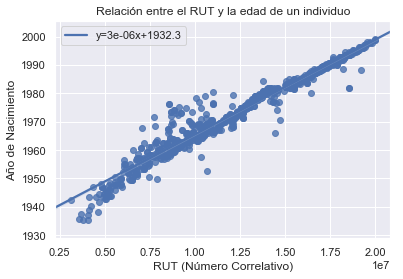

In [49]:
sns.set(color_codes=True)
ax = sns.regplot(x="rut", y="anoNacimiento", data=datos,
                line_kws={'label':"y={0:.1}x+{1:.1f}".format(slope,intercept)})
ax.set_title("Relación entre el RUT y la edad de un individuo")
ax.set_xlabel("RUT (Número Correlativo)")
ax.set_ylabel("Año de Nacimiento")
ax.legend()

## Conclusión
Existe una relación lineal significativa entre el número correlativo del RUT de un individuo y su fecha de nacimiento.
## Aplicación
Si deseas conocer el año de nacimiento de un individuo a partir de su RUT, debes multiplicar el número correlativo del RUT del individuo en millones por 3.34 y sumar 1932.26